## PV1 de C210 Turma L4

Nome: Matheus Henrique Fonseca Afonso

Matrícula: 1994 - GEC

Quando for enviar a prova envie também da seguinte forma MATRICULA.ipynb (Por exemplo, **1736.ipynb**)


#### Instruções:

- A prova deve ser resolvida em **1h30min**.
- A prova é Individual.
- Resolver as questões e enviar as respostas através desse Jupyter Notebook.
- Interpretação faz parte da prova.
- Não será permitida qualquer tipo de consulta, exceto à folha de resumo escrita e individual.

Boa Prova.

#### Questão 1 (25 pontos)

O conjunto de dados **"Social Network Ads"** contém informações sobre usuários de redes sociais e se eles clicaram ou não em um anúncio.

Este conjunto de dados é frequentemente utilizado para prever se um usuário vai clicar em um anúncio com base em suas características, como idade, gênero e salário estimado.

**Dada a situação hipotética:** Uma empresa quer estudar se uma pessoa compraria ou não seus produtos baseada em suas características pessoais. Para isso, pretendem usar um modelo de Machine Learning para predizer quem teria a maior chance de ser um comprador. Um número de pessoas participou de uma pesquisa inicial representada no Dataset *'Social_Network_Ads.csv'* onde a última coluna diz se a pessoa comprou algo ou não (0 para não comprou e 1 para o contrário).

Até agora, vimos 3 modelos de Machine Learning: **Classificação, Regressão e Clustering.**

Descomente e execute o código com o modelo que melhor resolve o problema.




In [2]:
# %pip install pandas -> já instalada no meu venv
import pandas as pd
dataset = pd.read_csv('Social_Network_Ads.csv')

dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
# %pip install numpy -> já instalada no meu venv
import numpy as np

p = dataset[['Age', 'EstimatedSalary']]  # Ignorando Gender
target = dataset['Purchased']

# %pip install scikit-learn -> já instalada no meu venv
from sklearn.model_selection import train_test_split

p_train, p_test, target_train, target_test = train_test_split(p, target, test_size=0.2, random_state = 0)

# Classificacao
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(p_train, target_train)
# knn_predict = knn.predict(p_test)

# Regressao Linear
# from sklearn.linear_model import LinearRegression
# linear = LinearRegression()
# linear.fit(p_train, target_train)

# Agrupamento
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(p_train)

# O PROBLEMA VISA AGRUPAR AS PESSOAS QUE SERIAM COMPRADORAS, POR ISSO O AGRUPAMENTO(CLUSTERING) SERIA O MELHOR MODELO
# PORQUE ELE VAI SEPARAR OS COMPRADORES E NÃO COMPRADORES EM DOIS GRUPOS E COM BASE NISSO, A EMPRESA PODE ESCOLHER O GRUPO
# DE COMPRADORES PARA OFERECER OS SEUS PRODUTOS

KMeans(n_clusters=3)

### Questão 2 (25 pontos)

O código abaixo, Cornfield Vector (PSO), usa como "poleiro" (função objetivo) os pontos $(0, 0)$ que é o mínimo global da função $ f(x, y) = x^2 + y^2 $

Suponhamos que a função seja modificada para $f(x, y) = (x - 1)^2 + (y + 2)^2 $

Ou seja, o poleiro seria os pontos $(1, -2)$

Considerando isso, modifique a função referência do código para que as partículas convirjam para o novo poleiro e coloque, também, o
Domínio e as dimensões do problema. 


In [4]:
import numpy as np

#Particula
class Particle:
    def __init__(self, num_dimensions, bounds):
        '''
        Construtor
        '''
        self.num_dimensions = num_dimensions
        self.bounds = bounds
        self.position = []
        self.velocity = []

        self.pbest = []
        self.pbest_score = np.inf
        self.score = np.inf

        # Para cada dimensão definir valores aleatórios entre os limites
        for i in range(self.num_dimensions):
            lower_bound = self.bounds[i][0]
            upper_bound = self.bounds[i][1]
            self.position.append(np.random.uniform(lower_bound, upper_bound))
            self.velocity.append(np.random.uniform(lower_bound, upper_bound))
            
    def __repr__(self):
        return f"\nPosition {self.position}\nVelocity {self.velocity}"
            
    def evaluate(self):
        '''
        Avaliação da função e atualização do pbest
        '''
        self.score = Utils.function(self.position)
        if self.score < self.pbest_score:
            self.pbest = self.position
            self.pbest_score = self.score
            
    def calculate_velocity(self, best):
        '''
        Gerando nova velocidade baseado na melhor posição (local ou global)
        Todas as operações são feitas simultaneamente para todas as dimensões
        Args:
            - best: posição do melhor (pbest ou gbest)
        '''
        # Calculando diferença entre a posição atual e a melhor
        delta = np.array(best) - np.array(self.position)
        
        # Sorteando magnitude aleatória
        magnitude = np.random.uniform(0, 0.5, size = self.num_dimensions)
        magnitude = np.round(magnitude, 2)
        
        # Multiplicando a magnitude pelo delta
        return delta*magnitude
    
    
        
    def update_velocity(self, gbest_pos, velocity_rate):
        '''
        Atualizar a nova velocidade
        Calcula a velocidade cognitiva (pbest) e a velocidade social (gbest) e atualiza a própria velocidade
        baseado em uma taxa para cada velocidade
        '''
        cognitive_velocity = self.calculate_velocity(self.pbest)
        social_velocity = self.calculate_velocity(gbest_pos)
        
        self.velocity = (np.array(self.velocity) * velocity_rate[0]
                        + cognitive_velocity * velocity_rate[1] 
                        + social_velocity * velocity_rate[2])
        
    def update_position(self):
        '''
        Atualizando a posição e verificando os limites
        '''
        self.position = list(np.array(self.position) + np.array(self.velocity))


#Enxame
class Swarm:

    def __init__(self, particles):
        '''
        Construtor
        '''
        self.particles = particles
        self.gbest = []
        self.gbest_score = np.inf
        
        
    def swarm_evaluate(self):
        '''
        Percorre todas as partículas para avaliá-las
        '''
        for p in self.particles:
            p.evaluate()
            
    def swarm_update_velocities(self, VELOCITY_RATE):
        '''
        Percorre todas as partículas e chama a função para atualizar a velocidade
        '''
        for p in self.particles:
            p.update_velocity(self.gbest, VELOCITY_RATE)

    def swarm_update_positions(self):
        '''
        Percorre todas as partículas e chama a função para atualizar a posição
        '''
        for p in self.particles:
            p.update_position()
            
    def swarm_update_gbest(self):
        '''
        Atualiza o gbest baseado no pbest de cada indivíduo
        '''
        for p in self.particles:
            if p.pbest_score < self.gbest_score:
                self.gbest_score = p.pbest_score
                self.gbest = p.pbest
                
    def swarm_mean_score(self):
        '''
        Calcula a pontuação média do enxame
        '''
        # Lendo a pontuação de cada partícula e colocando em uma lista
        scores = [p.score for p in self.particles]
        return (sum(scores) / len(scores))
    

#Utils
class Utils:
    
    @staticmethod
    def function(position):
        '''
        Calcula a distância euclidiana
        '''

        position = np.array(position)
        poleiro = np.array([1, -2])
        result = np.sqrt(sum((position - poleiro)**2))
            
        return result
    

from matplotlib import pyplot as plt
from PIL import Image
import glob
import os
import shutil

class PlotUtils:

    directory = "pso_plots"
    filename = 'pso_cornfield.gif'

    @staticmethod
    def start_plot():
        if os.path.exists(PlotUtils.directory):
            shutil.rmtree(PlotUtils.directory)
        if not os.path.exists(PlotUtils.directory):
            os.makedirs(PlotUtils.directory)

    @staticmethod
    def plot_particle(particle):
        plt.scatter(particle.position[0], particle.position[1])

    @staticmethod
    def plot_iteration(i):
        plt.title(f"PSO {i}")
        plt.xlim(-20, 20)
        plt.ylim(-20, 20)
        plt.xlabel('x[0]')
        plt.ylabel('x[1]')
        iteration = str(i).zfill(5)
        plt.savefig(f"pso_plots/iteration_{iteration}.png", facecolor = "white", dpi = 75)
        plt.close()

    @staticmethod
    def save():
        images = [Image.open(f) for f in sorted(glob.glob(PlotUtils.directory+"/*"))]
        img = images[0]
        img.save(fp=PlotUtils.filename, format='GIF', append_images=images, save_all=True, duration=200, loop=0)
        if os.path.exists(PlotUtils.directory):
            shutil.rmtree(PlotUtils.directory)


NUM_ITERATIONS = 30
NUM_PARTICLES = 100
NUM_DIMENSIONS = 2
BOUNDS = [(-10, 10), (-10, 10)]
VELOCITY_RATE = [0.5, 0.25, 0.25]

if __name__ == "__main__":
    PlotUtils.start_plot()
    gbest_historic = []
    score_historic = []

    particles = []
    for i in range(NUM_PARTICLES):
        particles.append(Particle(NUM_DIMENSIONS, BOUNDS))

    swarm = Swarm(particles)

    print("Starting iterations")
    i = 0
    while i < NUM_ITERATIONS:
        print(f"Iteration {i}")
       
        swarm.swarm_evaluate()
        swarm.swarm_update_gbest()
        swarm.swarm_update_velocities(VELOCITY_RATE)
        swarm.swarm_update_positions()
        
        gbest_historic.append(swarm.gbest_score)
        score_historic.append(swarm.swarm_mean_score())

        for p in swarm.particles:
            PlotUtils.plot_particle(p)
        PlotUtils.plot_iteration(i)
        
        i += 1

    PlotUtils.save()


print(f"Melhor posição: {swarm.gbest}")
print(f"Melhor pontuação: {swarm.gbest_score}")

Starting iterations
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Melhor posição: [1.006851373329227, -1.9996598402933192]
Melhor pontuação: 0.006859812324145072


#### Questão 3 (25 pontos)


Abaixo temos a implementação do Sliding Puzzle


Estado Inicial

|   1   |   0   |   2   | 

|   8   |   4   |   3   | 

|   7   |   6   |   5   | 

Estado Final

|   1   |   2   |   3   | 

|   8   |   0   |   4   | 

|   7   |   6   |   5   | 

O código abaixo contém a implementação da Busca em largura

Baseado nisso, faça o que se pede:

**item a) (15 pontos)** Nas implementações, vimos que cada tipo de busca implementa um tipo de fila. Descomente a fila correta para a Busca em largura 

**item b) (5 pontos)** Instâncie os estados iniciais e finais do Sliding Puzzle


In [5]:
import numpy as np

class SlidingPuzzle():
    def __init__(self, num_blocos):
        '''
        Construtor
        Args:
            - num_blocos: numero de blocos por linha e coluna, valor inteiro (Ex: 3 significa 3 linhas e 3 colunas)
        '''
        self.num_blocos = num_blocos

    def _encontra_posicao(self, estado, elemento):
        '''
        Varre todo o tabuleiro (estado) e verifica em qual posição 'elemento' está
        Args:
            - estado: matriz contendo o estado do tabuleiro
            - elemento: elemento a ser buscado na matriz
        Return:
            - Retorna a linha e coluna onde o elemento se encontra
        '''
        for i in range(self.num_blocos):
            for j in range(self.num_blocos):
                if estado[i, j] == elemento:
                    return i, j
        return None, None

    def verifica_estados(self, atual, objetivo):
        '''
        Verifica se dois estados são iguais
        Args:
            - atual: matriz que descreve o estado atual
            - objetivo: matriz que descreve o estado objetivo
        Return:
            - booleano dizendo se o estado atual é ou não o objetivo
        '''
        flag = True
        for i in range(self.num_blocos):
            for j in range(self.num_blocos):
                if atual[i, j] != objetivo[i, j]:
                    flag = False
                    break

        return flag

    def expande_estados(self, atual):
        '''
        Dado o estado atual, realiza a expansão de estados
        Args:
            - atual: matriz que descreve o estado atual
        Return:
            - lista com os novos estados após a expansão
        '''
        
        novos_estados = []
        linha, coluna = self._encontra_posicao(atual, 0)

        # Cima
        if linha > 0:
            novo_estado = np.copy(atual)
            nova_linha = linha - 1

            bloco_alvo = novo_estado[nova_linha, coluna]
            novo_estado[nova_linha, coluna] = 0
            novo_estado[linha, coluna] = bloco_alvo

            novos_estados.append(novo_estado)

        # Baixo
        if linha < self.num_blocos - 1:
            novo_estado = np.copy(atual)
            nova_linha = linha + 1

            bloco_alvo = novo_estado[nova_linha, coluna]
            novo_estado[nova_linha, coluna] = 0
            novo_estado[linha, coluna] = bloco_alvo

            novos_estados.append(novo_estado)


        # Esquerda
        if coluna > 0:
            novo_estado = np.copy(atual)
            nova_coluna = coluna - 1

            bloco_alvo = novo_estado[linha, nova_coluna]
            novo_estado[linha, nova_coluna] = 0
            novo_estado[linha, coluna] = bloco_alvo

            novos_estados.append(novo_estado)

        # Direita
        if coluna < self.num_blocos - 1:
            novo_estado = np.copy(atual)
            nova_coluna = coluna + 1

            bloco_alvo = novo_estado[linha, nova_coluna]
            novo_estado[linha, nova_coluna] = 0
            novo_estado[linha, coluna] = bloco_alvo

            novos_estados.append(novo_estado)

        return novos_estados
    
from queue import LifoQueue, Queue

class BreadthFirstSearch():
    def __init__(self, problema):
        '''
        Construtor
        Args:
            - problema: objeto do problema a ser solucionado
        '''
        self.problema = problema
        
    def _verifica_visitado(self, estado, estados_visitados):
        '''
        Verifica se 'estado' está na lista de estados visitados
        Args:
            - estado: estado qualquer do tabuleiro
            - estados_visitados: lista com todos os estados já visitados
        Return:
            - booleano dizendo se o estado foi visitado ou não
        '''
        for i in estados_visitados:
            if self.problema.verifica_estados(i, estado):
                return True
        return False
    
    def busca(self, inicio, fim):
        '''
        Realiza a busca, armazenando os estados em uma FILA
        Args:
            - inicio: estado inicial do problema
            - fim: estado objetivo
        Return:
            - booleano se a solução foi encontrada, lista dos estados visitados, quantidade de estados visitados
        '''
        # Escolha qual deve ser a Queue correta para a Busca em Largura - BreadthFirstSearch (BFS) 
        # fila = LifoQueue()
        fila = Queue()
        fila.put(inicio)
        
        solucao_encontrada = False
        estados_visitados = []
        cont_estados = 0
        
        while not fila.empty():
            atual = fila.get()
            estados_visitados.append(atual)
            
            if self.problema.verifica_estados(atual, fim):
                solucao_encontrada = True
                break
                
            else:
                cont_estados += 1
                print(f"Visitando #{cont_estados}")
                print(atual)

                novos_estados = self.problema.expande_estados(atual)
                for i in novos_estados:
                    if not self._verifica_visitado(i, estados_visitados):
                        fila.put(i)
                        
        return solucao_encontrada, estados_visitados, cont_estados
    
    

In [9]:
# Criando objeto do problema
problema = SlidingPuzzle(3)

# Criando Matriz inicial e matriz alvo
start = np.matrix([[1, 0, 2], [8, 4, 3], [7, 6, 5]])
target = np.matrix([[1, 2, 3], [8, 0, 4], [7, 6, 5]])

# Mostrando informações iniciais
print(f"Initial state: \n{start}")
print("*"*15)
print(f"Target state: \n{target}")
print("*"*15)

# Execução do BFS
bfs = BreadthFirstSearch(problema)

bfs_solucao, estd_encont, cont_estads = bfs.busca(start, target) # chamando busca

if bfs_solucao:
    print(f"Solution found!!!")
    print("Número de estados: " + str(cont_estads))
else:
    print("Solution not found!!!")

Initial state: 
[[1 0 2]
 [8 4 3]
 [7 6 5]]
***************
Target state: 
[[1 2 3]
 [8 0 4]
 [7 6 5]]
***************
Visitando #1
[[1 0 2]
 [8 4 3]
 [7 6 5]]
Visitando #2
[[1 4 2]
 [8 0 3]
 [7 6 5]]
Visitando #3
[[0 1 2]
 [8 4 3]
 [7 6 5]]
Visitando #4
[[1 2 0]
 [8 4 3]
 [7 6 5]]
Visitando #5
[[1 4 2]
 [8 6 3]
 [7 0 5]]
Visitando #6
[[1 4 2]
 [0 8 3]
 [7 6 5]]
Visitando #7
[[1 4 2]
 [8 3 0]
 [7 6 5]]
Visitando #8
[[8 1 2]
 [0 4 3]
 [7 6 5]]
Visitando #9
[[1 2 3]
 [8 4 0]
 [7 6 5]]
Visitando #10
[[1 4 2]
 [8 6 3]
 [0 7 5]]
Visitando #11
[[1 4 2]
 [8 6 3]
 [7 5 0]]
Visitando #12
[[0 4 2]
 [1 8 3]
 [7 6 5]]
Visitando #13
[[1 4 2]
 [7 8 3]
 [0 6 5]]
Visitando #14
[[1 4 0]
 [8 3 2]
 [7 6 5]]
Visitando #15
[[1 4 2]
 [8 3 5]
 [7 6 0]]
Visitando #16
[[8 1 2]
 [7 4 3]
 [0 6 5]]
Visitando #17
[[8 1 2]
 [4 0 3]
 [7 6 5]]
Visitando #18
[[1 2 3]
 [8 4 5]
 [7 6 0]]
Solution found!!!
Número de estados: 18


#### Questão 4 (25 pontos)

Dada a função $f(x,y) = (x^2 + y -11)^2 +(x + y^2 -7)^2$ com 4 mínimos locais

  1. $(3, 2)$
  2. $(-2.805118, 3.13131)$
  3. $(-3.779310, -3.283186)$
  4. $(3.584428, -1.848126)$

Sendo o global localizado aproximadamente em $(3, 2)$

Utilize o código de Algoritimos genéticos para fazer as questões abaixo:


**Item a) (5 pontos)** troque a função a ser minimizada para $(x^2 + y -11)^2 +(x + y^2 -7)^2$.

**Item b) (5 pontos)** fixe o ponto de crossover para o sétimo ponto de intercessão dos genes.

**Item c) (15 pontos)** na seleção dos pais em `selection` escolha os 2 melhores cromossomos usando a função `find_best_chromossome`. *Dica: para não selecionar os dois mesmos cromossomos retire o primeiro selecionado da cópia da população usando `population_copy = population.copy()` e `population_copy.remove(parent1)` ou então faça um Slicing `population_copy[:-1]`*.

GENERATION: 0
POPULATION:
[(Gene: [0 0 1 1 0 0 0 1 1 0], Score: 26.000), (Gene: [1 0 0 1 0 1 0 1 0 0], Score: 16804.000), (Gene: [0 0 1 0 0 0 1 0 1 1], Score: 544.000), (Gene: [0 0 0 0 0 0 0 0 0 0], Score: 170.000), (Gene: [1 1 1 0 1 0 1 1 1 1], Score: 32468.000), (Gene: [1 0 1 0 0 0 1 0 1 1], Score: 7840.000), (Gene: [0 1 1 1 1 0 1 0 0 0], Score: 1768.000), (Gene: [0 0 1 0 1 1 0 1 0 0], Score: 8290.000), (Gene: [0 0 0 0 0 1 1 1 1 0], Score: 47540.000), (Gene: [0 1 1 0 1 0 1 0 1 1], Score: 544.000), (Gene: [1 1 1 1 1 0 0 1 1 0], Score: 47258.000), (Gene: [1 0 0 1 1 1 1 1 1 0], Score: 50906.000), (Gene: [0 1 0 1 1 0 1 0 1 0], Score: 530.000), (Gene: [1 1 0 1 0 0 0 1 0 0], Score: 25700.000), (Gene: [0 0 0 1 1 0 1 0 0 1], Score: 260.000), (Gene: [0 0 1 0 1 0 1 0 0 1], Score: 170.000), (Gene: [0 0 1 1 1 1 1 0 0 1], Score: 18152.000), (Gene: [1 1 0 0 0 0 1 1 1 0], Score: 22516.000), (Gene: [1 1 0 1 1 0 1 1 1 1], Score: 23642.000), (Gene: [1 1 0 1 0 1 1 1 1 1], Score: 73810.000), (Gene: [1 0

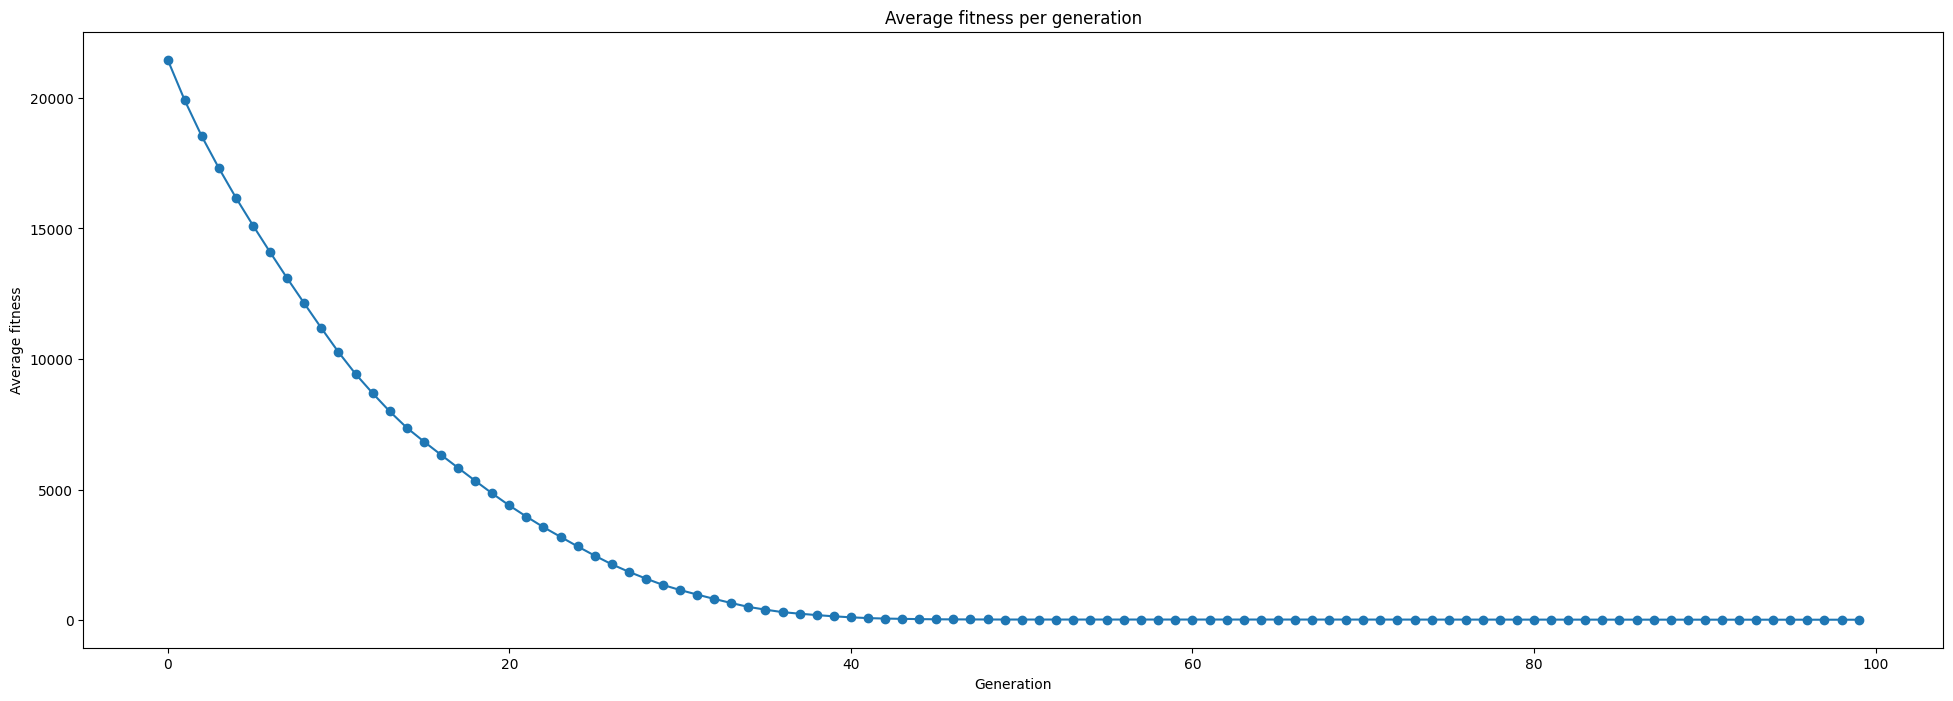

Minimum generation score: 13.0
Best chromossome (Gene: [0 0 1 1 0 0 0 0 1 0], Score: 10.000)


In [10]:
import numpy as np

# Classe para manutenção de dados no formato de conjunto de bits
class BitSet:
    
    def __init__(self, size):
        '''
        Construtor
        Args:
            - size: tamanho do bitset
        '''
        # Preencher um array [size] com False
        self.bits = np.full(size, False)
        
    def __repr__(self):
        '''Definir o que aparecerá quando um objeto for printado'''
        return (f"{self.bits*1}")
        
    def get(self, index):
        '''
        Retornar o bit da posição 'index'
        Args:
            - index: posição do bit
        '''
        return self.bits[index]
    
    def set_(self, index, value):
        '''
        Substitui o bit da posição 'index' pelo 'value'
        Args:
            - index: posição a ser substituída
            - value: valor a ser adicionado na posição 'index'
        '''
        self.bits[index] = value
        
    def flip(self, index):
        '''
        Inverte o bit da posição 'index'
        Args:
            - index: índice do bit a ser invertido
        '''
        self.bits[index] = not self.bits[index]
        
    def debug(self):
        '''
        Printar os bits
        '''
        print(self.bits)

class Chromossome:
    
    def __init__(self, x = None, y = None):
        '''
        Construtor
        Atribui o genótipo de x e y ao cromossomo
        Args:
            - x: valor de x
            - y: valor de y
        '''
        x = np.random.randint(-15, 16) if x is None else x
        y = np.random.randint(-15, 16) if y is None else y
        
        self.genes = Chromossome.get_genotype(x, y)
        self.score = np.inf
        
    def __repr__(self):
        '''Apresentar os genes e a pontuação quando utilizar print(Chromossome)'''
        return (f'(Gene: {self.genes}, Score: {self.score:.3f})')
    
    def __lt__(self, other):
        ''' Ordenar em ordem decrescente'''
        return self.score > other.score
    
    @staticmethod
    def to_binary(variable):
        '''
        Converte o fenótipo (decimal) em genótipo(binário)
        '''
        variable = "{:05b}".format(variable)
        signal = 1 if variable[0] == "-" else 0
        variable = variable[1:]
        variable += str(signal)
        
        return variable

    @staticmethod
    def get_genotype(x, y):
        '''
        Transforma os fenótipos em genótipos 
        '''
        bits = BitSet(10)

        x_genotype = Chromossome.to_binary(x)
        y_genotype = Chromossome.to_binary(y)
        xy_binary = x_genotype + y_genotype
        
        for i in range(10):
            bits.set_(i, xy_binary[i] == '1')

        return bits

    @staticmethod
    def get_fenotype(genes):
        '''
        Transforma os valores binários dos genes em decimais 
        '''
        # XXXXX YYYYY (5 bits to each variable: 4 for value and 1 for sign pos/neg)
        # 01234 56789 (bits are indexed from left to right)
        # 8421K 8421K (bits on indices 4 and 9 represent the variables sign, i.e.
        #              0 represents a positive and 1 represents a negative value)

        x = (8 * genes.get(0) + 4 * genes.get(1) +
             2 * genes.get(2) + 1 * genes.get(3))

        if (genes.get(4) == 1):
            x *= -1

        y = (8 * genes.get(5) + 4 * genes.get(6) +
             2 * genes.get(7) + 1 * genes.get(8))

        if (genes.get(9) == 1):
            y *= -1

        return x, y
    

class Problem:

    @staticmethod
    def function(x, y):
        '''
        Função avaliada
        '''
        return ((x**2 + y - 11)**2 + (x + y**2 - 7)**2)
    
    @staticmethod
    def score(x, y):
        '''
        Função a ser minimizada
        '''
        return abs(Problem.function(x, y))

    @staticmethod
    def score_chromossome(chromossome):
        '''
        Transforma o genótipo em fenótipo e calcula o valor da função
        '''
        x, y = Chromossome.get_fenotype(chromossome.genes)
        return Problem.score(x, y)

    @staticmethod
    def score_average(population):
        '''
        Pontuação média da população
        '''
        avg = 0
        for chromossome in population:
            avg += Problem.score_chromossome(chromossome)
        avg /= len(population)
        return avg
    
    @staticmethod
    def update_chromossome_score(chromossome):
        '''
        Atualiza pontuação do cromossomo
        '''
        genes_aux = Chromossome.get_fenotype(chromossome.genes)
        x = genes_aux[0]
        y = genes_aux[1]
        chromossome.score = Problem.score(x,y)

class GeneticUtils:
    
    @staticmethod
    def find_best_chromossome(population):
        '''
        Retorna o melhor cromossomo
        '''
        population.sort()
        return population[-1]

    @staticmethod
    def find_worst_chromossome(population):
        '''
        Retorna o pior cromossomo
        '''
        population.sort()
        return population[0]

    
class GeneticOperators:

    @staticmethod
    def selection(population):
        '''
        Seleciona os pais
        '''
        # parents = np.random.choice(population, size=2, replace = False)
        # parent1, parent2 = parents[0], parents[1]

        # Selecionando o melhor cromossomo para o primeiro pai
        parent1 = GeneticUtils.find_best_chromossome(population)

        # fazendo a cópia da população e separando o parent1
        population_copy = population.copy()
        population_copy.remove(parent1)

        # pegando o segundo melhor pai da população usando a população cópia - não possui o parent1
        parent2 = GeneticUtils.find_best_chromossome(population_copy)

        return parent1, parent2
    
    @staticmethod
    def crossover(population, parent1, parent2):
        '''
        Aplica o cruzamento
        '''
        # crossover_point = np.random.randint(1,10)
        crossover_point = 7     # ponto de crossover setado para 7
        parent1_genes = parent1.genes
        parent2_genes = parent2.genes

        child1_genes = BitSet(10)
        child2_genes = BitSet(10)

        for i in range(crossover_point):
            child1_genes.set_(i, parent1_genes.get(i))
            child2_genes.set_(i, parent2_genes.get(i))

        for i in range(crossover_point, 10):
            child1_genes.set_(i, parent2_genes.get(i))
            child2_genes.set_(i, parent1_genes.get(i))

        child1 = Chromossome()
        child1.genes = child1_genes
        
        child2 = Chromossome()
        child2.genes = child2_genes
        
        Problem.update_chromossome_score(child1)
        Problem.update_chromossome_score(child2)
        
        print("========= CROSSOVER ==========")
        print(f"PARENTS:\n{parent1}\n{parent2}")
        print(f"CHILDREN:\n{child1}\n{child2}")
        print("==============================")
        
        population.append(child1)
        population.append(child2)
        
    @staticmethod
    def mutation(population, mutation_threshold):
        '''
        Aplica a mutação
        '''
        prob = np.random.uniform(0, 1)

        if prob >= mutation_threshold:
            return
        
        chromossome = np.random.choice(population)
        print("========== MUTATING ==========")
        print(chromossome)

        mutation_point = np.random.randint(0, 10)
        chromossome.genes.flip(mutation_point)
        Problem.update_chromossome_score(chromossome)
        print(chromossome)
        print("==============================")
        
    @staticmethod
    def elitism(population):
        '''
        Remove o pior indivíduo
        '''
        print("========== REMOVING ==========")
        for _ in range(2):
            worst_individual = GeneticUtils.find_worst_chromossome(population)
            print(worst_individual)
            population.remove(worst_individual)

MAX_GENERATION = 100
INITIAL_POPULATION = 100
MUTATION_THRESHOLD = 0.01

if __name__ == "__main__":
    
    # População inicial
    population = []
    for _ in range(INITIAL_POPULATION):
        chromossome_aux = Chromossome()
        Problem.update_chromossome_score(chromossome_aux)
        population.append(chromossome_aux)
        
    # Variáveis de controle
    generation = 0
    population_score = []
    
    # Para cada geração
    while generation < MAX_GENERATION:
        print(f"GENERATION: {generation}")
        print(f"POPULATION:\n{population}")
        # Pontuação da população
        population_score.append(Problem.score_average(population))
        
        # Seleção
        parent1, parent2 = GeneticOperators.selection(population)
        
        # Crossover
        GeneticOperators.crossover(population, parent1, parent2)
        
        # Mutação
        GeneticOperators.mutation(population, MUTATION_THRESHOLD)
        
        # Elitismo
        GeneticOperators.elitism(population)
        
        print(f"Average score: {population_score[generation]}")
        print("="*50)
        
        generation += 1
        
    best_chromossome = GeneticUtils.find_best_chromossome(population)
    print(f"Best chromossome {best_chromossome}")


plt.figure(figsize=(24,8))
plt.xlabel('Generation')
plt.ylabel('Average fitness')
plt.title('Average fitness per generation')
plt.plot(population_score, marker = "o")
plt.show()

print(f"Minimum generation score: {min(population_score)}")
print(f"Best chromossome {best_chromossome}")